<a href="https://colab.research.google.com/github/Yolkkaii/Logic-Project/blob/main/Logic_Coding_Project_ID_68xxxxxx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

1.   In the top menu, go to **File** > **Save a copy in Drive** and save a copy of this notebook in your Google Drive.
2.   Open the recently saved copy of this notebook and, on the top left of the page, rename the file by replacing "**68xxxxxx**" by your student ID.
3.   Code your project on the notebook.
4.   Once done, go to the menu **File > Download > Download .ipynb** and save the file onto your computer.
5.   Submit your .ipynb file on GoEDU at https://goedu.kmitl.ac.th/mod/assign/view.php?id=169963



## Use the following program to determine which problems you can choose from

In [ ]:
your_student_id = 68011278  # Replace this number by your student ID no.

# DO NOT CHANGE THE CODE BELOW
x = (your_student_id % 6) + 1
y = (3*your_student_id % 5) + 1
if x==y:
  y = 6

print("You can choose to solve either Problem", x, "or Problem", y, "only.")

# Applications of SAT Solvers




For this project, you are to write a Python program that solves one of the following problems by formulating the problem as a SAT problem and using a SAT solver to solve it. **Use the program above to determine which problems you can choose from.**


These are typical steps in solving a problem using a SAT solver.

1.	Define the propositional atoms to be used and their meanings.
2.	From the description of the problem, write a formula using the defined propositional atoms such that the formula is satisfiable if and only the problem has a solution. Convert the formula into an equivalent formula in CNF.
3.	Apply the SAT solver to determine whether the CNF formula is satisfiable or not. If the formula is satisfiable, extract a solution to the problem from a truth assignment that satisfies the formula. If the formula is unsatisfiable, report that the problem has no solutions.

You can use either an efficient SAT solver available on the Internet or the following SAT solver which is a simple implementation of the DPLL algorithm.

**IN ADDITION TO PROVIDING THE SOURCE CODE OF YOUR PROGRAM, YOU MUST EXPLAIN HOW YOU SOLVED THE PROBLEM IN 3 STEPS AS DESCRIBED ABOVE.**

In [ ]:
### An implementation of a simplified DPLL algorithm

## Some helper functions
# Get the complement of literal 'lit'
def comp(lit):
  if lit[0]!='~':
    return '~' + lit
  else:
    return lit[1:]

# Check whether 'clause' contains complementary literals or Top
def tautology(clause):
    for lit in clause:
        if comp(lit) in clause:
            return True
    return False

# Resolve each clause in cnf with lit
def resolve(cnf, lit):
  # Remove every clause containing lit
  new_cnf = [c for c in cnf if lit not in c]
  # Remove the complement of lit from each clause
  comp_lit = comp(lit)
  new_cnf = [[l for l in c if l != comp_lit] for c in new_cnf]
  return new_cnf

## Check whether cnf is satisfiability using DPLL
def sat(cnf):
  # Remove tautologies
  cnf = [c for c in cnf if not tautology(c)]
  result = dpll(cnf)
  return result

# Apply the simplified DPLL algorithm
def dpll(cnf):
    # Empty set of clauses is obviously satisfiable.
    if len(cnf) == 0:
        return {}

    # If cnf contains an empty clause, it is unsatisfiable.
    if [] in cnf:
        return None

    # Find a unit clause in the clause set
    uc = next((c for c in cnf if len(c)==1), None)
    if uc is not None:
      # In case there is a unit clause:
      # Perform unit propagation
      lit = uc[0]
      cnf_lit = resolve(cnf, lit)
      result = dpll(cnf_lit)
    else:
      # In case there is no unit clause:
      # Select the first literal in the first clause
      lit = cnf[0][0]
      # Try resolving with lit
      cnf_lit = resolve(cnf, lit)
      result = dpll(cnf_lit)
      if result is None:
          # Try resolving with the complement of lit
          lit = comp(lit)
          cnf_lit = resolve(cnf, lit)
          result = dpll(cnf_lit)

    # Update the truth assignment and return
    if result is None:
      return None
    else:
      if lit[0]=='~':
        result[comp(lit)] = False
      else:
        result[lit] = True
      return result


In [ ]:
### Examples of usage
# A CNF formula is represented by a list of clauses.
# Each clause is represented by a list of literals.
# Each literal is a string of the form 'p' or '~p',
#    where p is a propositional atom.
# Top and bottom are not supported in the above implementation.

cnf1 = [['r','~s','t'],
       ['p','~r','~s'],
       ['~t'],
       ['~p','~q','t'],
       ['s','t'],
       ['~p','q']]
print(sat(cnf1))
# Output 'None' because cnf1 is unsatisfiable.

cnf2 = [['q','~r'],
        ['~p','t'],
        ['p','s','r'],
        ['~s', 't'],
        ['p','~q']]
print(sat(cnf2))
# Output {'t': True, 'p': True, 'q': True} meaning that any truth assignment
# where t, p, and q true (s and r can be either true or false) satisfies
# cnf2.


## Example: Solving 2x2 Sudoku

Use a SAT solver to solve the 2x2 sudoku game below.

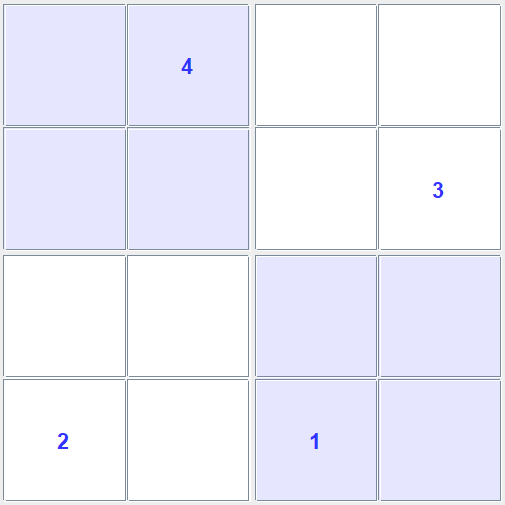

In [ ]:
!pip3 install ColabTurtlePlus
from ColabTurtlePlus.Turtle import *

#  -----------
# |11|12|13|14|
#  -----------
# |21|22|23|24|
#  -----------
# |31|32|33|34|
#  -----------
# |41|42|43|44|
#  -----------
# Propositional atom pijk means cell (i,j) contains k.
# Helper functions for creating literals
def p(i,j,k):
    return 'p'+str(i)+str(j)+str(k)
def np(i,j,k):
    return '~p'+str(i)+str(j)+str(k)

# S will be used to store the list of the clauses to be constructed
S = []

# Generate clauses for each condition of 2x2 sudoku game
# 1. Each cell contains a single number, 1-4.
for i in range(1,5):
    for j in range(1,5):
        # Cell (i,j) contains at least one of the numbers 1-4
        S.append([p(i,j,k) for k in range(1,5)])
        # Cell (i,j) may not contain two numbers
        for c in range(1,4):
            for d in range(c+1,5):
                S.append([np(i,j,c),np(i,j,d)])

# 2. Each row contains all numbers 1-4.
for i in range(1,5):
    for k in range(1,5):
        # Row i must contain number k
        S.append([p(i,j,k) for j in range(1,5)])

# 3. Each column contains all numbers 1-4.
for j in range(1,5):
    for k in range(1,5):
        # Column j must contain number k
        S.append([p(i,j,k) for i in range(1,5)])

# 4. Each block contains all numbers 1-4.
for b in range(0,4):
    for k in range(1,5):
        # Block b must contain number k
        S.append([p(2*(b//2)+c//2+1, 2*(b%2)+c%2+1,k) for c in range(0,4)])

# 5. Initial numbers
S.append([p(1,2,4)])
S.append([p(2,4,3)])
S.append([p(4,1,2)])
S.append([p(4,3,1)])

# Check for satisfiability
result = sat(S)

if result is None:
    print('No solution')
else:
    # Draw sudoku board with the solution
    initializeTurtle(window=(800,600))
    speed(13)
    for i in range(1,5):
        for j in range(1,5):
            penup()
            goto((j-3)*100, (3-i)*100)
            setheading(0)
            pendown()
            # Draw cell (i,j)
            for d in range(4):
                forward(100)
                right(90)
            for k in range(1,5):
                if result[p(i,j,k)]:
                    penup()
                    goto((j-3)*100+50, (3-i)*100-50)
                    write(k, align='center')
                    break
    home()

## Problem 1: N Queens

In a square chessboard, a queen is a chess piece that can move either vertically, horizontally, or diagonally in any number of blocks to attack another chess piece. In an $n$-queens problem, the goal is to determine whether it is possible to place $n$ queens on an $n \times n$ chessboard such that no queen can attack any other queen. If it is possible, find which the locations on the $n\times n$ chessboard where the $n$ queens should be placed.

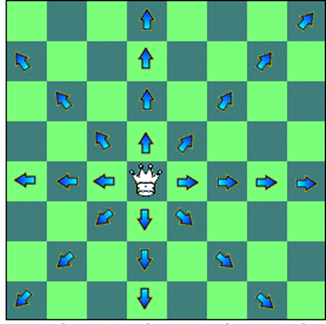

http://www.learntoplaychess.com/chess-moves.htm

**Input**: The dimension $n$, where $1 \le n \le 9$, of the chessboard.

**Output**: If there is a solution, draw (using the ColabTurtle module) the $n \times n$ chessboard and the $n$ queens; otherwise, print out “No solution”.

**Hint**: Define the propositional atoms $P_{i,j}$ where $1 \le i, j  \le n$ which means the “a queen is placed at row $i$ and column $j$ of the chessboard”.

### Provide a clear explanation on how to solve this problem using a SAT solver

You may include some pictures or handwritten note in your explanation.










**Step 1:** What are the propositional atoms that you will use and what are their meanings?

......


**Step 2:** How will you construct a CNF formula for this problem?

......


**Step 3:** How will you interpret the output of the SAT solver as a solution to the problem?

......

### Your program

In [ ]:
!pip3 install ColabTurtlePlus
from ColabTurtlePlus.Turtle import *

initializeTurtle(window=(800,600))
speed(13)


## Problem 2: Einstein’s riddle

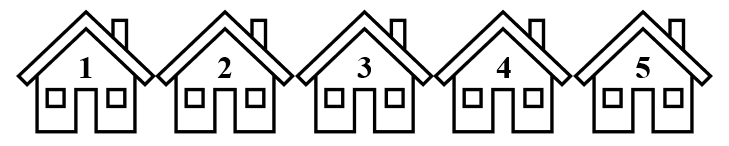

The Einstein’s riddle is rumored to be created by Albert Einstein. There are many variations of this puzzle. One of them featuring in Life International magazine in 1962, featuring a zebra as one of the pets in the puzzle. Hence, the puzzle has also been widely known as the **zebra puzzle**. We will be considering a version of this puzzle.

There are five houses in a row. Each house has a different color (red, white, green, yellow, blue) and is owned by a man of a different nationality (Brit, Swede, Dane, Norwegian, German). Each of the owners has a different pet (dog, bird, cat, horse, fish), prefers a different kind of drinks (tea, coffee, milk, beer, water), and smokes a different brand of cigarettes (Pall Mall, Dunhill, Blends, Blue Master, Prince).
Furthermore, the following information is given:
1.   The Brit lives in the red house.
2.   The Swede keeps dogs as pets.
3.   The Dane drinks tea.
4.   The green house is on the right of the white house, next to each other.
5.   The owner of the green house drinks coffee.
6.   The person who smokes Pall Mall rears birds.
7.   The owner of the yellow house smokes Dunhill.
8.   The man living in the center house drinks milk.
9.   The Norwegian lives in the first house.
10.   The man who smokes Blends lives next to the one who keeps cats.
11.   The man who keeps horses lives next to the man who smokes Dunhill.
12.   The man who smokes Blue Master drinks beer.
13.   The German smokes Prince.
14.   The Norwegian lives next to the blue house.
15.   The man who smokes Blends has a neighbour who drinks water.

The puzzle asks: **Who owns the fish?**

**Input**: None

**Output**: The house number and the nationality of the person who owns the fish.

**Hint**: Suppose the houses along the row from left to right are numbered 1 to 5 and the attributes are encoded as follows:


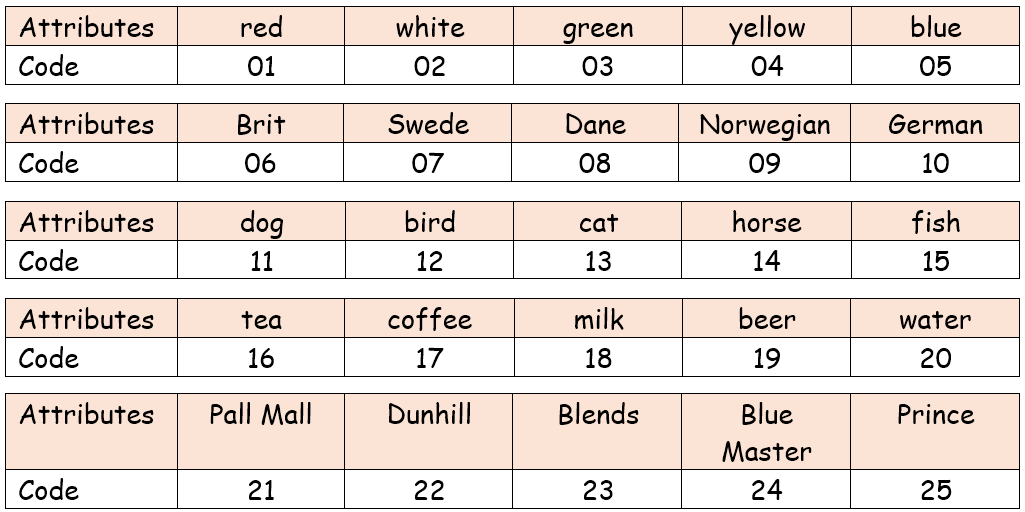

Define the propositional atoms $P_{i,a}$ where $i$ is a house number (1…5) and $a$ is the code for an attribute (01 … 25). The meaning of $P_{i,a}$ is “The person who lives in house no. $i$ has attribute $a$”. For example,
*   $P_{2,06}$ means “The person who lives in house no. 2 is a Brit.”
*   $P_{5,18}$ means “The person who lives in house no. 5 drinks milk.”


### Provide a clear explanation on how to solve this problem using a SAT solver

You may include some pictures or handwritten note in your explanation.










**Step 1:** What are the propositional atoms that you will use and what are their meanings?

......


**Step 2:** How will you construct a CNF formula for this problem?

......


**Step 3:** How will you interpret the output of the SAT solver as a solution to the problem?

......

### Your program

## Problem 3: Tetromino

In a tetromino tiling puzzle, you are given a blank board that is divided into $n \times m$ squares and also given an unlimited supply of tetromino blocks of 4 types: I, J, Z, O, as shown in the picture below.

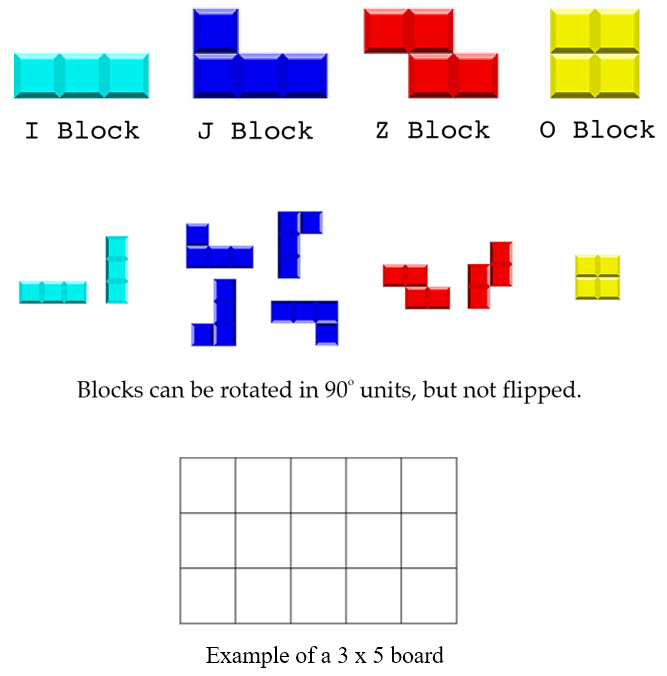

Given the dimensions $n$ (the number of rows) and $m$ (the number of columns) of the board, the problem is to determine whether it is possible to fill tetromino blocks into the board so the blocks fit the board perfectly, i.e. blocks do not overlap and there is no unfilled space left on the board.

**Input**: The dimensions $n$ and $m$ of the board, where $1 \le n, m \le 9$

**Output**: If there is a solution, draw (using the ColabTurtle module) an $n \times m$ board perfectly filled with tetromino blocks; otherwise, print out “No solution”.


### Provide a clear explanation on how to solve this problem using a SAT solver

You may include some pictures or handwritten note in your explanation.










**Step 1:** What are the propositional atoms that you will use and what are their meanings?

......


**Step 2:** How will you construct a CNF formula for this problem?

......


**Step 3:** How will you interpret the output of the SAT solver as a solution to the problem?

......

### Your program

In [ ]:
!pip3 install ColabTurtlePlus
from ColabTurtlePlus.Turtle import *

initializeTurtle(window=(800,600))
speed(13)


## Problem 4: Latin Square

An **Latin square** of order n is an n x n grid such that

1.   each cell in the grid contains one of the numbers 1,2,...,n,
2.   every row contains every number 1,2,...,n, and
3.   every column contains every number 1,2,...,n.

The following is an example of a Latin square of order 4.



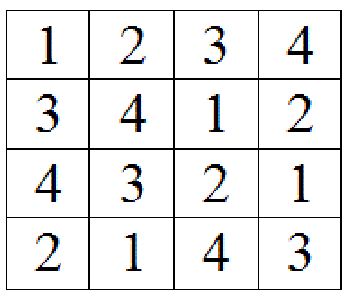

For this problem, you are given a partially-filled Latin square and are asked to complete it by filling in the remaining cells (if possible).

In particular, you are to implement a function **find_latin_square(n,p)**, where
1.   n is the order of the Latin square to be completed (where 1 <= n <= 10), and
2.   p is a list of constraints, where each constraint is of the form (i,j,x) indicating that the cell at row i and column j must be filled with the number x, where row and column indices start from 0 up to n-1.

The function find_latin_square(n,p) should return either a list representation of a completed Latin square satisfying the constraints or None (if such a completed Latin square does not exist).

You are then ask to use the turtle module to draw the completed Latin square, if exists.

### Provide a clear explanation on how to solve this problem using a SAT solver

You may include some pictures or handwritten note in your explanation.










**Step 1:** What are the propositional atoms that you will use and what are their meanings?

......


**Step 2:** How will you construct a CNF formula for this problem?

......


**Step 3:** How will you interpret the output of the SAT solver as a solution to the problem?

......

### Your program

In [ ]:
def find_latin_square(n,p):
  # Your code here
  pass

In [ ]:
!pip3 install ColabTurtlePlus
from ColabTurtlePlus.Turtle import *

def draw_latin_square(sq):
  # Your code here
  pass

In [ ]:
# Test script
n = 4
p = [(0,0,1),(2,1,3),(1,3,2),(3,2,4)]
sq = find_latin_square(n,p)

if sq is not None:
  draw_latin_square(sq)

## Problem 5: Magic Square

An **magic square** of order n is an n x n grid, where

1.   each cell in the grid contains one of the numbers $1,2,...,n^2$,
2.   every number in $1,2,...,n^2$ must appear in exactly one cell, and
3.   the sum of the numbers in each row, in each column, and both main diagonals are all equal.

The following is an example of a magic square of order 3.

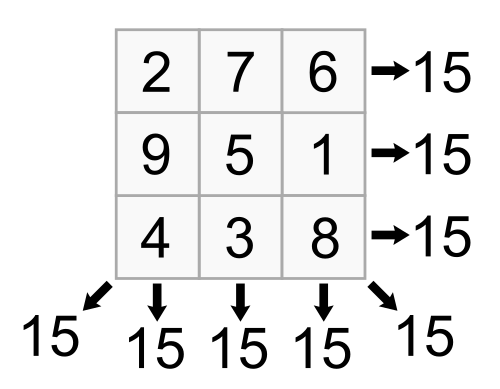

For this problem, you are asked to write a Python program to generate and draw a magic square of order n, if exists.

In particular, you are to implement the function **find_magic_square(n)**, where n (1 <= n <= 10) is the order of the magic square to be constructed , which returns either a list representation of a magic square of order n or None (if such a magic square does not exist).

You are then ask to use the turtle module to draw the generated magic square, if exists.

### Provide a clear explanation on how to solve this problem using a SAT solver

You may include some pictures or handwritten note in your explanation.










**Step 1:** What are the propositional atoms that you will use and what are their meanings?

......


**Step 2:** How will you construct a CNF formula for this problem?

......


**Step 3:** How will you interpret the output of the SAT solver as a solution to the problem?

......

### Your program

In [ ]:
def find_magic_square(n):
  # Your code here
  pass

In [ ]:
!pip3 install ColabTurtlePlus
from ColabTurtlePlus.Turtle import *

def draw_magic_square(sq):
  # Your code here
  pass

In [ ]:
# Test script
n = 3
sq = find_magic_square(n)

if sq is not None:
  draw_magic_square(sq)

## Problem 6: Class Scheduling

Suppose you are asked to schedule the classes for a cohort of students. There are m classes that the students need to study in each week and there are n time slots in each week, where 1<=m<=n<=20. Each class takes exactly one of the n time slots.

You are given the title of each of the m classes. The n time slots are numbered 1,...,n.

For some of the classes, you are given a constraint on its time slot, which is given by a list of positive numbers or a list of negative numbers.
*  If the constraint is a list of positive numbers, say [1,3,5], the numbers in the list represent the only possible time slots that the class may be held. Hence, for the given example, the class may be held only in Slot No. 1 or 3 or 5.
*  If the constraint is a list of negative numbers, say [-1,-2,-9,-10], the numbers in the list represent the time slots that the class must **not** be held in. Hence, for the given example, the class may be held in any time slots **except** Slot No. 1 and 2 and 9 and 10.

You are to implement the function **schedule(n,classes,cd)**, where
*  n is the number of time slots (1<=n<=20),
*  classes is the list of the titles of each of the m classes, where 1<=m<=n,
*  cd is the dictionary of constraints; for example, cd['calculus'], if exists, is the constraint for the calculus class.

The function returns a dictionary **t** of a schedule of the classes that satisfies the constrainst. For example, if **t**['calculus'] = 3, then the calculus class is to be held in Slot No. 3. The function should return None if a schedule that satisfies the constraints does not exist.

You are also to implement the function **print_schedule(n,t)** which prints out the class in each time slot (one time slot per line). For example,
```
 1: calculus
 2: logic
 3: -
 4: -
 5: python
 ...
```




### Provide a clear explanation on how to solve this problem using a SAT solver

You may include some pictures or handwritten note in your explanation.










**Step 1:** What are the propositional atoms that you will use and what are their meanings?

......


**Step 2:** How will you construct a CNF formula for this problem?

......


**Step 3:** How will you interpret the output of the SAT solver as a solution to the problem?

......

### Your program

In [ ]:
def schedule(n,classes,cd):
  # Your code here
  pass

In [ ]:
def print_schedule(n,t):
  # Your code here
  pass

In [ ]:
# Test script
n = 10
classes = ['calculus','logic','python','rust','circuit']
cd = {'calculus':[1,3,5], 'python':[4,6,8,10], 'rust':[-1,-2,-9,-10], 'circuit':[-1,-2,-4,-7,-8]}
t = schedule(n,classes,cd)

if t is not None:
  print_schedule(n,t)